In [1]:
import pandas as pd

In [15]:
df = pd.read_csv("data\Disneyland-all.csv")

In [5]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


## Sentiment Analysis

### TextBlob

In [16]:
from textblob import TextBlob

In [17]:
polarity = []

for sentence in df["Review_Text"]:
    polarity.append(TextBlob(sentence).polarity)

In [18]:
subjectivity = []

for sentence in df["Review_Text"]:
    subjectivity.append(TextBlob(sentence).subjectivity)

In [19]:
df["textblob_polarity"], df["textblob_subjectivity"] = polarity, subjectivity

In [20]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,textblob_polarity,textblob_subjectivity
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981,0.561481
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131,0.434649
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498,0.422944
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286,0.512143
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667,0.437500
...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,0.252273,0.570682
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,0.179250,0.620750
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,0.153205,0.459615
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,0.265327,0.559821


<AxesSubplot:ylabel='Frequency'>

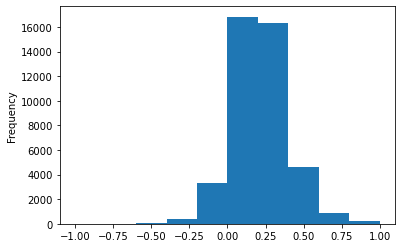

In [21]:
df["textblob_polarity"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

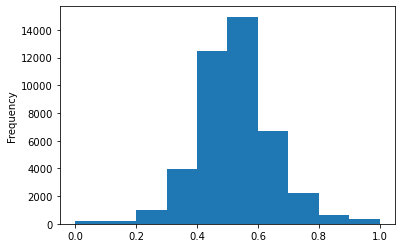

In [22]:
df["textblob_subjectivity"].plot.hist()

In [23]:
df['tb_Sentiment_Type'] = ''
df.loc[df["textblob_polarity"]>0,'tb_Sentiment_Type']='POSITIVE'
df.loc[df["textblob_polarity"]==0,'tb_Sentiment_Type']='NEUTRAL'
df.loc[df["textblob_polarity"]<0,'tb_Sentiment_Type']='NEGATIVE'

<AxesSubplot:>

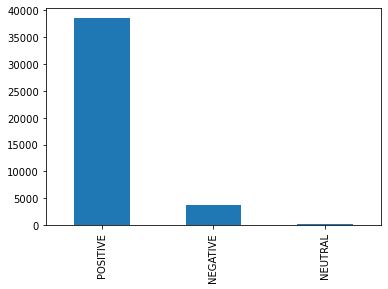

In [24]:
df['tb_Sentiment_Type'].value_counts().plot.bar()

### Vader

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
vs = []

for sentence in df["Review_Text"]:
    vs.append(analyzer.polarity_scores(sentence))

In [27]:
df["vs_score"] = vs

In [28]:
df['compound'] = df['vs_score'].apply(lambda score_dict: score_dict['compound'])
df['vs_sentiment_type']=''
df.loc[df.compound>0,'vs_sentiment_type']='POSITIVE'
df.loc[df.compound==0,'vs_sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'vs_sentiment_type']='NEGATIVE'

In [29]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,textblob_polarity,textblob_subjectivity,tb_Sentiment_Type,vs_score,compound,vs_sentiment_type
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981,0.561481,POSITIVE,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.7069,POSITIVE
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131,0.434649,POSITIVE,"{'neg': 0.044, 'neu': 0.76, 'pos': 0.195, 'com...",0.9853,POSITIVE
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498,0.422944,POSITIVE,"{'neg': 0.022, 'neu': 0.758, 'pos': 0.22, 'com...",0.9920,POSITIVE
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286,0.512143,POSITIVE,"{'neg': 0.078, 'neu': 0.768, 'pos': 0.154, 'co...",0.8425,POSITIVE
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667,0.437500,POSITIVE,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.2846,POSITIVE


<AxesSubplot:>

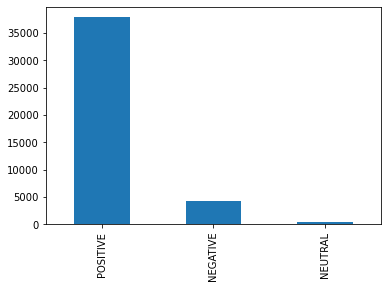

In [30]:
df['vs_sentiment_type'].value_counts().plot.bar()

Next: classification model?

### NLTK

In [31]:
import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import state_union

#### Frequent words

In [32]:
stopwords = nltk.corpus.stopwords.words("english")

In [33]:
text = " ".join(review for review in df["Review_Text"])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 29766104 words in the combination of all review.


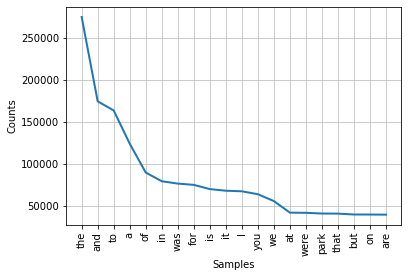

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(20)

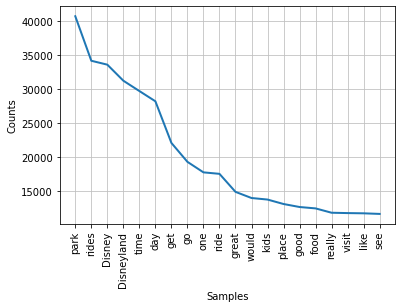

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
words = [w for w in tokens if w.lower() not in stopwords] # excluding stopwords
freq = FreqDist(words)
freq.plot(20)

In [36]:
freq.tabulate(10) # the most frequent 10 words

      park      rides     Disney Disneyland       time        day        get         go        one       ride 
     40725      34179      33603      31245      29726      28219      22095      19314      17768      17549 


#### Concordance & Collocations

In the context of NLP, a concordance is a collection of word locations along with their context. 
You can use concordances to find:

How many times a word appears?

Where each occurrence appears?

What words surround each occurrence?

In [75]:
text2 = nltk.Text(words)
text2.concordance("park", lines=10)
# concordance_list = text2.concordance_list("park", lines=10)
# for entry in concordance_list:
#     print(entry.line)

Displaying 10 of 45346 matches:
 Disney brand Seems local like Ocean Park even worst got SMILING face wanna u 
nts Last also Starbucks inside theme park Thanks God hot humid visiting park o
e park Thanks God hot humid visiting park otherwise would big issue lot shade 
nderwhelmed choice rides attractions park quite small really expecting somethi
 enjoyed HK Disneyland great compact park Unfortunately quite bit maintenance 
 expensive Disneyland well Basically park good small children people never Dis
mid week biggest disappointment food Park Even Maxim decent Restaurant Main St
king could find map place priced fun park Disney characters 2 seen cabana phot
nd day went early went straight back park lineups children got go many rides t
s general food drink expensive small park easily done 1 day huge enough visit 


Collocations are series of words that frequently appear together in a given text. 

In the State of the Union corpus, for example, you’d expect to find the words United and States appearing next to each other very often. Those two words appearing together is a collocation.

In [84]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(text2)
finder.ngram_fd.most_common(10)
#finder.ngram_fd.tabulate(2)

[(('happiest', 'place', 'earth'), 1010),
 (('Hong', 'Kong', 'Disneyland'), 910),
 (('Big', 'Thunder', 'Mountain'), 752),
 (('year', 'old', 'daughter'), 459),
 (('4', 'year', 'old'), 449),
 (('get', 'fast', 'pass'), 434),
 (('fast', 'pass', 'system'), 431),
 (('Walt', 'Disney', 'World'), 418),
 (('Disneyland', 'California', 'Adventure'), 411),
 (('day', 'park', 'hopper'), 402)]

#### NLTK Sentiment Analyzer

In [39]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marielle\AppData\Roaming\nltk_data...


In [40]:
sia = SentimentIntensityAnalyzer() # based on vader lexicon

In [41]:
nltk_score = []

for review in df["Review_Text"]:
    nltk_score.append(sia.polarity_scores(review))

In [42]:
df["nltk_score"] = nltk_score

In [43]:
df['nltk_compound'] = df['nltk_score'].apply(lambda score_dict: score_dict['compound'])
df['nltk_sentiment_type']=''
df.loc[df.nltk_compound>0,'nltk_sentiment_type']='POSITIVE'
df.loc[df.nltk_compound==0,'nltk_sentiment_type']='NEUTRAL'
df.loc[df.nltk_compound<0,'nltk_sentiment_type']='NEGATIVE'

<AxesSubplot:>

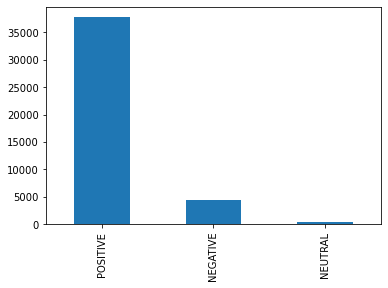

In [44]:
df['nltk_sentiment_type'].value_counts().plot.bar()

In [45]:
# Negative review frequent word list:
neg_review = df[df['nltk_sentiment_type']=='NEGATIVE']["Review_Text"]

neg_text = " ".join(review for review in neg_review)
neg_tokens = tokenizer.tokenize(neg_text)
neg_words = [w for w in neg_tokens if w.lower() not in stopwords] # excluding stopwords

freq = FreqDist(neg_words)
freq.most_common(10)

[('park', 4221),
 ('Disney', 3687),
 ('rides', 3584),
 ('Disneyland', 2781),
 ('day', 2484),
 ('time', 2444),
 ('get', 2314),
 ('ride', 1971),
 ('one', 1957),
 ('go', 1896)]

Next step: analyze the Concordance & Collocations of the negative reviews to identify problems that bothers tourists most?

## More EDA

In [49]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image
from spacy import displacy
from collections import Counter
import spacy
import en_core_web_lg
# !python -m spacy download en_core_web_lg
# !python -m spacy download en


In [78]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,vs_score,compound,vs_sentiment_type
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.7069,POSITIVE
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"{'neg': 0.044, 'neu': 0.76, 'pos': 0.195, 'com...",0.9853,POSITIVE
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"{'neg': 0.022, 'neu': 0.758, 'pos': 0.22, 'com...",0.9920,POSITIVE
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"{'neg': 0.078, 'neu': 0.768, 'pos': 0.154, 'co...",0.8425,POSITIVE
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.2846,POSITIVE


In [6]:
df2 = df.groupby(['Reviewer_Location'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=True).head(10)
df2.style.background_gradient(cmap="autumn", subset=['Rating'])

,Reviewer_Location,Rating
147,Turks and Caicos Islands,1.500000
136,Suriname,2.000000
132,South Sudan,2.000000
39,Ecuador,2.333333
58,Haiti,3.000000
36,Democratic Republic of the Congo,3.000000
128,Slovenia,3.000000
107,Northern Mariana Islands,3.000000
129,Solomon Islands,3.000000
41,El Salvador,3.000000


In [50]:
# new data frame with split value columns 
new = df["Year_Month"].str.split("-", n = 1, expand = True) 
  
# making separate year column from new data frame 
df["year"]= new[0] 
  
# making separate mounth column from new data frame 
df["month"]= new[1] 

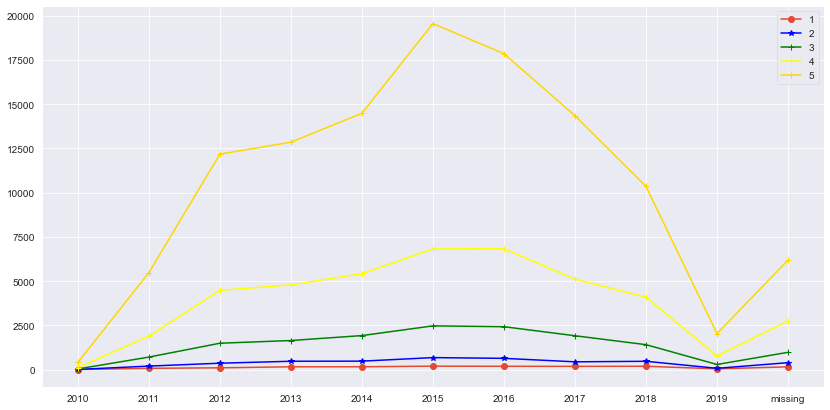

In [53]:
# Ratings in every year
one = df.loc[df['Rating']==1]
one=one.groupby('year',as_index=False).agg({'Rating':'sum'})
#== 
two = df.loc[df['Rating']==2]
two=two.groupby('year',as_index=False).agg({'Rating':'sum'})

#== 
three = df.loc[df['Rating']==3]
three=three.groupby('year',as_index=False).agg({'Rating':'sum'})
#=== 
four = df.loc[df['Rating']==4]
four=four.groupby('year',as_index=False).agg({'Rating':'sum'})
#===
fifth = df.loc[df['Rating']==5]
fifth=fifth.groupby('year',as_index=False).agg({'Rating':'sum'})
#============== 
sns.set_style("darkgrid")
plt.figure(figsize=(14,7))
plt.plot(one['year'] ,one['Rating'],marker='o',label='1') 
plt.plot(two['year'] , two['Rating'],color='blue',marker='*',label='2')  
plt.plot(three['year'] ,three['Rating'],color='green',marker='+',label='3') 
plt.plot(four['year'] ,four['Rating'],color='yellow',marker='+',label='4') 
plt.plot(fifth['year'] ,fifth['Rating'],color='gold',marker='+',label='5') 
plt.legend();
plt.savefig("rating_year.jpg", bbox_inches='tight', dpi = 300)

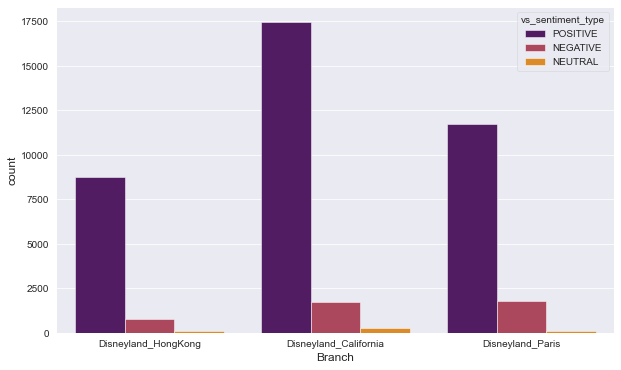

In [54]:
# Sentiment type by branch
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='vs_sentiment_type',palette='inferno');
plt.savefig("output\sentiment_branch.jpg", bbox_inches='tight', dpi = 300)

In [49]:
import en_core_web_sm

In [79]:
df_dislike=df.loc[df['vs_sentiment_type']=='NEGATIVE']
review = df_dislike['Review_Text'].drop_duplicates()
all_sentences = []

for word in review:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
#== 
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
#== 
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
#== 
import spacy
nlp = spacy.load('en_core_web_lg')
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#== 
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
#== 
df2 = df2[:20,]
#== 
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
#====== 
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
#======
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000
#=====
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

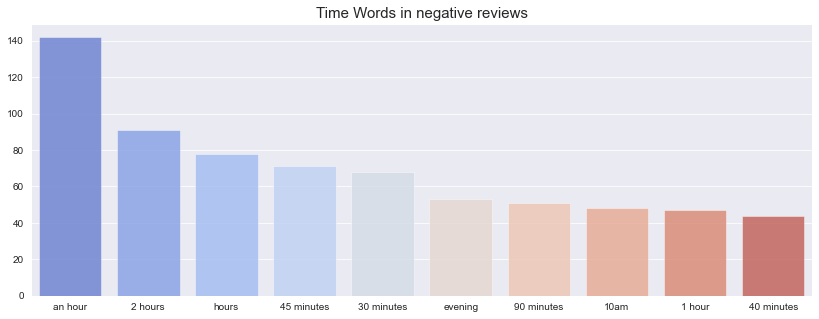

In [80]:
TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="coolwarm");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

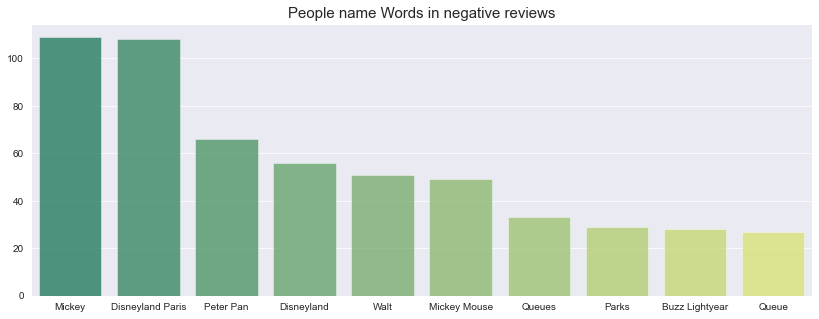

In [81]:
PERSON = df6.query("Entity == 'PERSON'")
PERSON =PERSON['Word'].value_counts()
PERSON = PERSON[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=PERSON.index,y= PERSON.values, alpha=0.8,palette="summer");
plt.title('People name Words in negative reviews',fontsize=15);
plt.show();

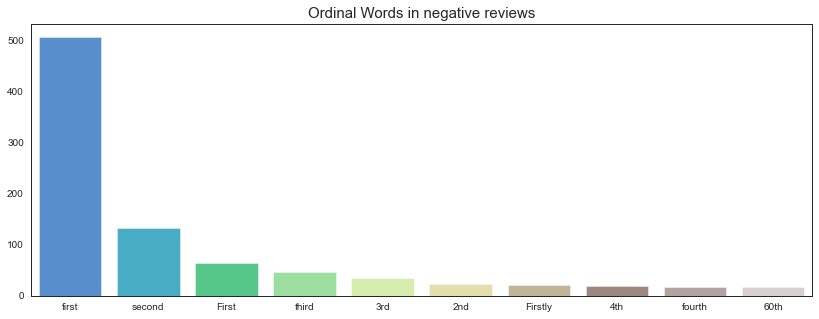

In [82]:
ORDINAL = df6.query("Entity == 'ORDINAL'")        
ORDINAL =ORDINAL['Word'].value_counts()
ORDINAL = ORDINAL[:10]
sns.set_style("white")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=ORDINAL.index,y= ORDINAL.values, alpha=0.8,palette="terrain");
plt.title('Ordinal Words in negative reviews',fontsize=15);
plt.show();

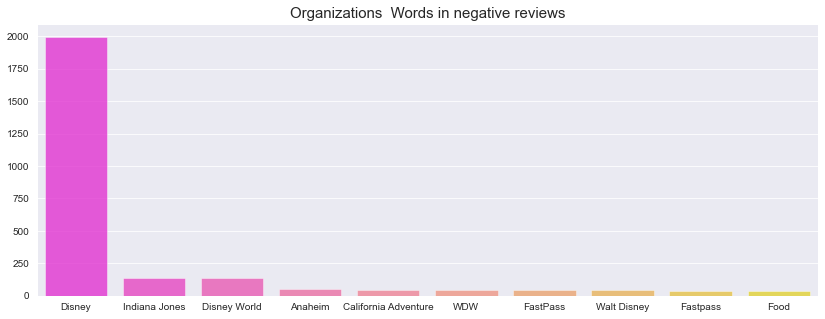

In [83]:
ORG = df6.query("Entity == 'ORG'")        
ORG =ORG['Word'].value_counts()
ORG = ORG[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
ORG = sns.barplot(x=ORG.index,y= ORG.values, alpha=0.8,palette="spring");
plt.title('Organizations  Words in negative reviews',fontsize=15);
plt.show();

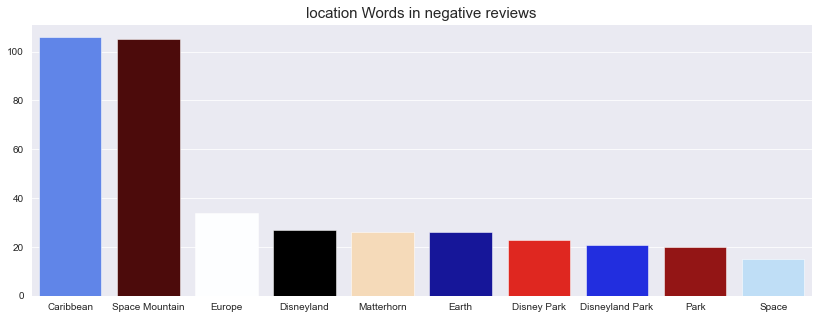

In [85]:
LOC = df6.query("Entity == 'LOC'")        
LOC =LOC['Word'].value_counts()
LOC = LOC[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
NORP = sns.barplot(x=LOC.index,y= LOC.values, alpha=1,palette="flag");
plt.title('location Words in negative reviews',fontsize=15);
plt.show();

In [88]:
df_copy = df
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('caribbean'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['vs_sentiment_type']=='NEGATIVE']
print(df_don['Review_Text'].values[1:2])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[6:7])
# Pirates of caribbean and Space Mountain are the most popular rides! (but the waiting time is too long!)

['We arrived here early and had an early breakfast before riding Pirates of caribbean , Indy Jones, Haunted Mansion and pin shopping.  Great park for kids and families.  Very tired by end of day.  Thumbs up!']


['We share the views of many people writing here. Disneyland Paris was an absolute shambles when we visited on 20th August. Rides continuously closed. We had five rides close while we were in the queue and with too excited young children it was very upsetting. Two of them (pirates of the caribbean and thunder mountain) we had already waited for over an hour. We were at the park for over 12 hours and went on a total of 5 rides having spent the whole day in lines. The only time we were not in a queue for a ride, we were in a queue for (overpriced, poor quality) food. Disney dreams shattered for all...']


["I have just returned from a two day visit to disneyland paris and all I can say is what a disappointment. Firstly, you could be in any theme park in Europe and it is only occa

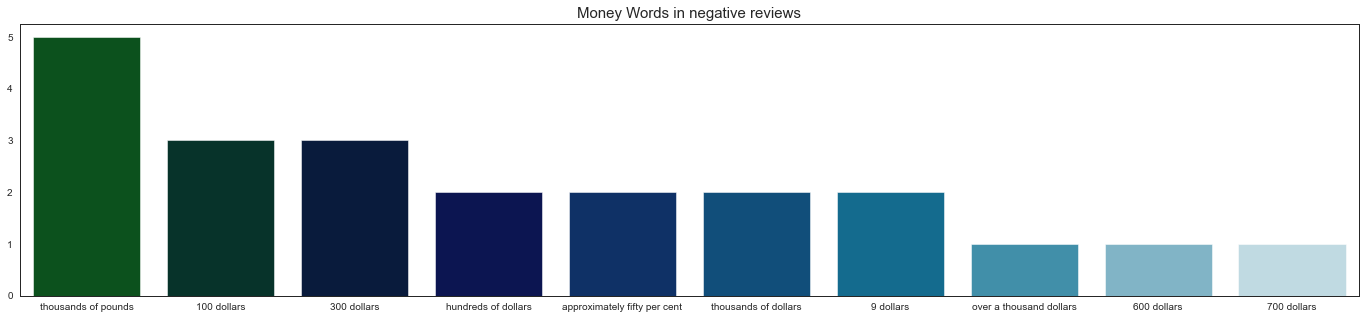

In [84]:
PRODUCT = df6.query("Entity == 'MONEY'")        
PRODUCT =PRODUCT['Word'].value_counts()
PRODUCT = PRODUCT[:10]
sns.set_style("white")
plt.figure(figsize=(24,5));
NORP = sns.barplot(x=PRODUCT.index,y= PRODUCT.values, alpha=1,palette="ocean");
plt.title('Money Words in negative reviews',fontsize=15);
plt.show();